Step 1. 데이터 전처리
TfidfVectorizer로 텍스트 벡터화
Stopwords 제거, 소문자 통일 등 기본 클렌징

Step 2. 세 가지 모델 학습
모델 1: Naive Bayes (MultinomialNB)
모델 2: SGDClassifier (linear SVM with hinge loss)
모델 3: BERT 기반 분류기 (Hugging Face의 transformers 라이브러리 사용, distilbert-base-uncased 추천)

Step 3. 모델 학습 및 예측
훈련 데이터로 학습 → 테스트 데이터로 예측 수행

Step 4. 성능 비교
정확도(Accuracy)
정밀도/재현율/F1-score (macro average)
학습 속도 및 예측 시간 비교 (옵션)

Step 5. 결과 분석 및 보고서 작성
성능 비교 그래프/표 작성
각 모델의 강점/약점 분석

최종적으로 어떤 모델이 왜 적합한지 선정


In [2]:
# 0. 데이터셋 준비
# 이 코드는 20 Newsgroups 데이터셋을 불러오는 예제입니다.

from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

In [3]:
# Step 1: 데이터 전처리
# TfidfVectorizer로 텍스트 벡터화
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', # 불용어(stop_word) 제거
                             lowercase=True, # 소문자 통일
                             max_df=0.95, # 문서의 95% 이상에서 등장하면 제외 (너무 흔한 단어 제외)
                             min_df=2 # 문서의 2개 이상에서 등장해야 포함 (너무 드문 단어 제외)
                             ) 
X_train = vectorizer.fit_transform(newsgroups_train.data) # 벡터화된 훈련 데이터
X_test = vectorizer.transform(newsgroups_test.data) # 벡터화된 테스트 데이터

 Step 2. 세 가지 모델 학습
 모델 1: Naive Bayes (MultinomialNB) --> 뉴스 분류, 감정 분석 등 텍스트 분류

 우선적 고려 
 1. 이 데이터는 텍스트 분류에 적합한가? -> O
 2. 이 데이터는 변수간 독립성이 보장되는가? -> 확인 해야 한다
 3. 이 데이터의 양은 어떠한가? -> 충분히 많다 --> 나이브 베이즈 모델을 사용하기에 적합하지는 않다.

C:\Users\chlwo\AppData\Local\Temp\ipykernel_51096\2893220753.py:28: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\chlwo\AppData\Local\Temp\ipykernel_51096\2893220753.py:28: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\chlwo\AppData\Local\Temp\ipykernel_51096\2893220753.py:28: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\chlwo\AppData\Local\Temp\ipykernel_51096\2893220753.py:28: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\chlwo\AppData\Local\Temp\ipykernel_51096\2893220753.py:28: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\chlwo\AppData\Local\Temp\ipykernel_51096\2893220753.py:28: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from

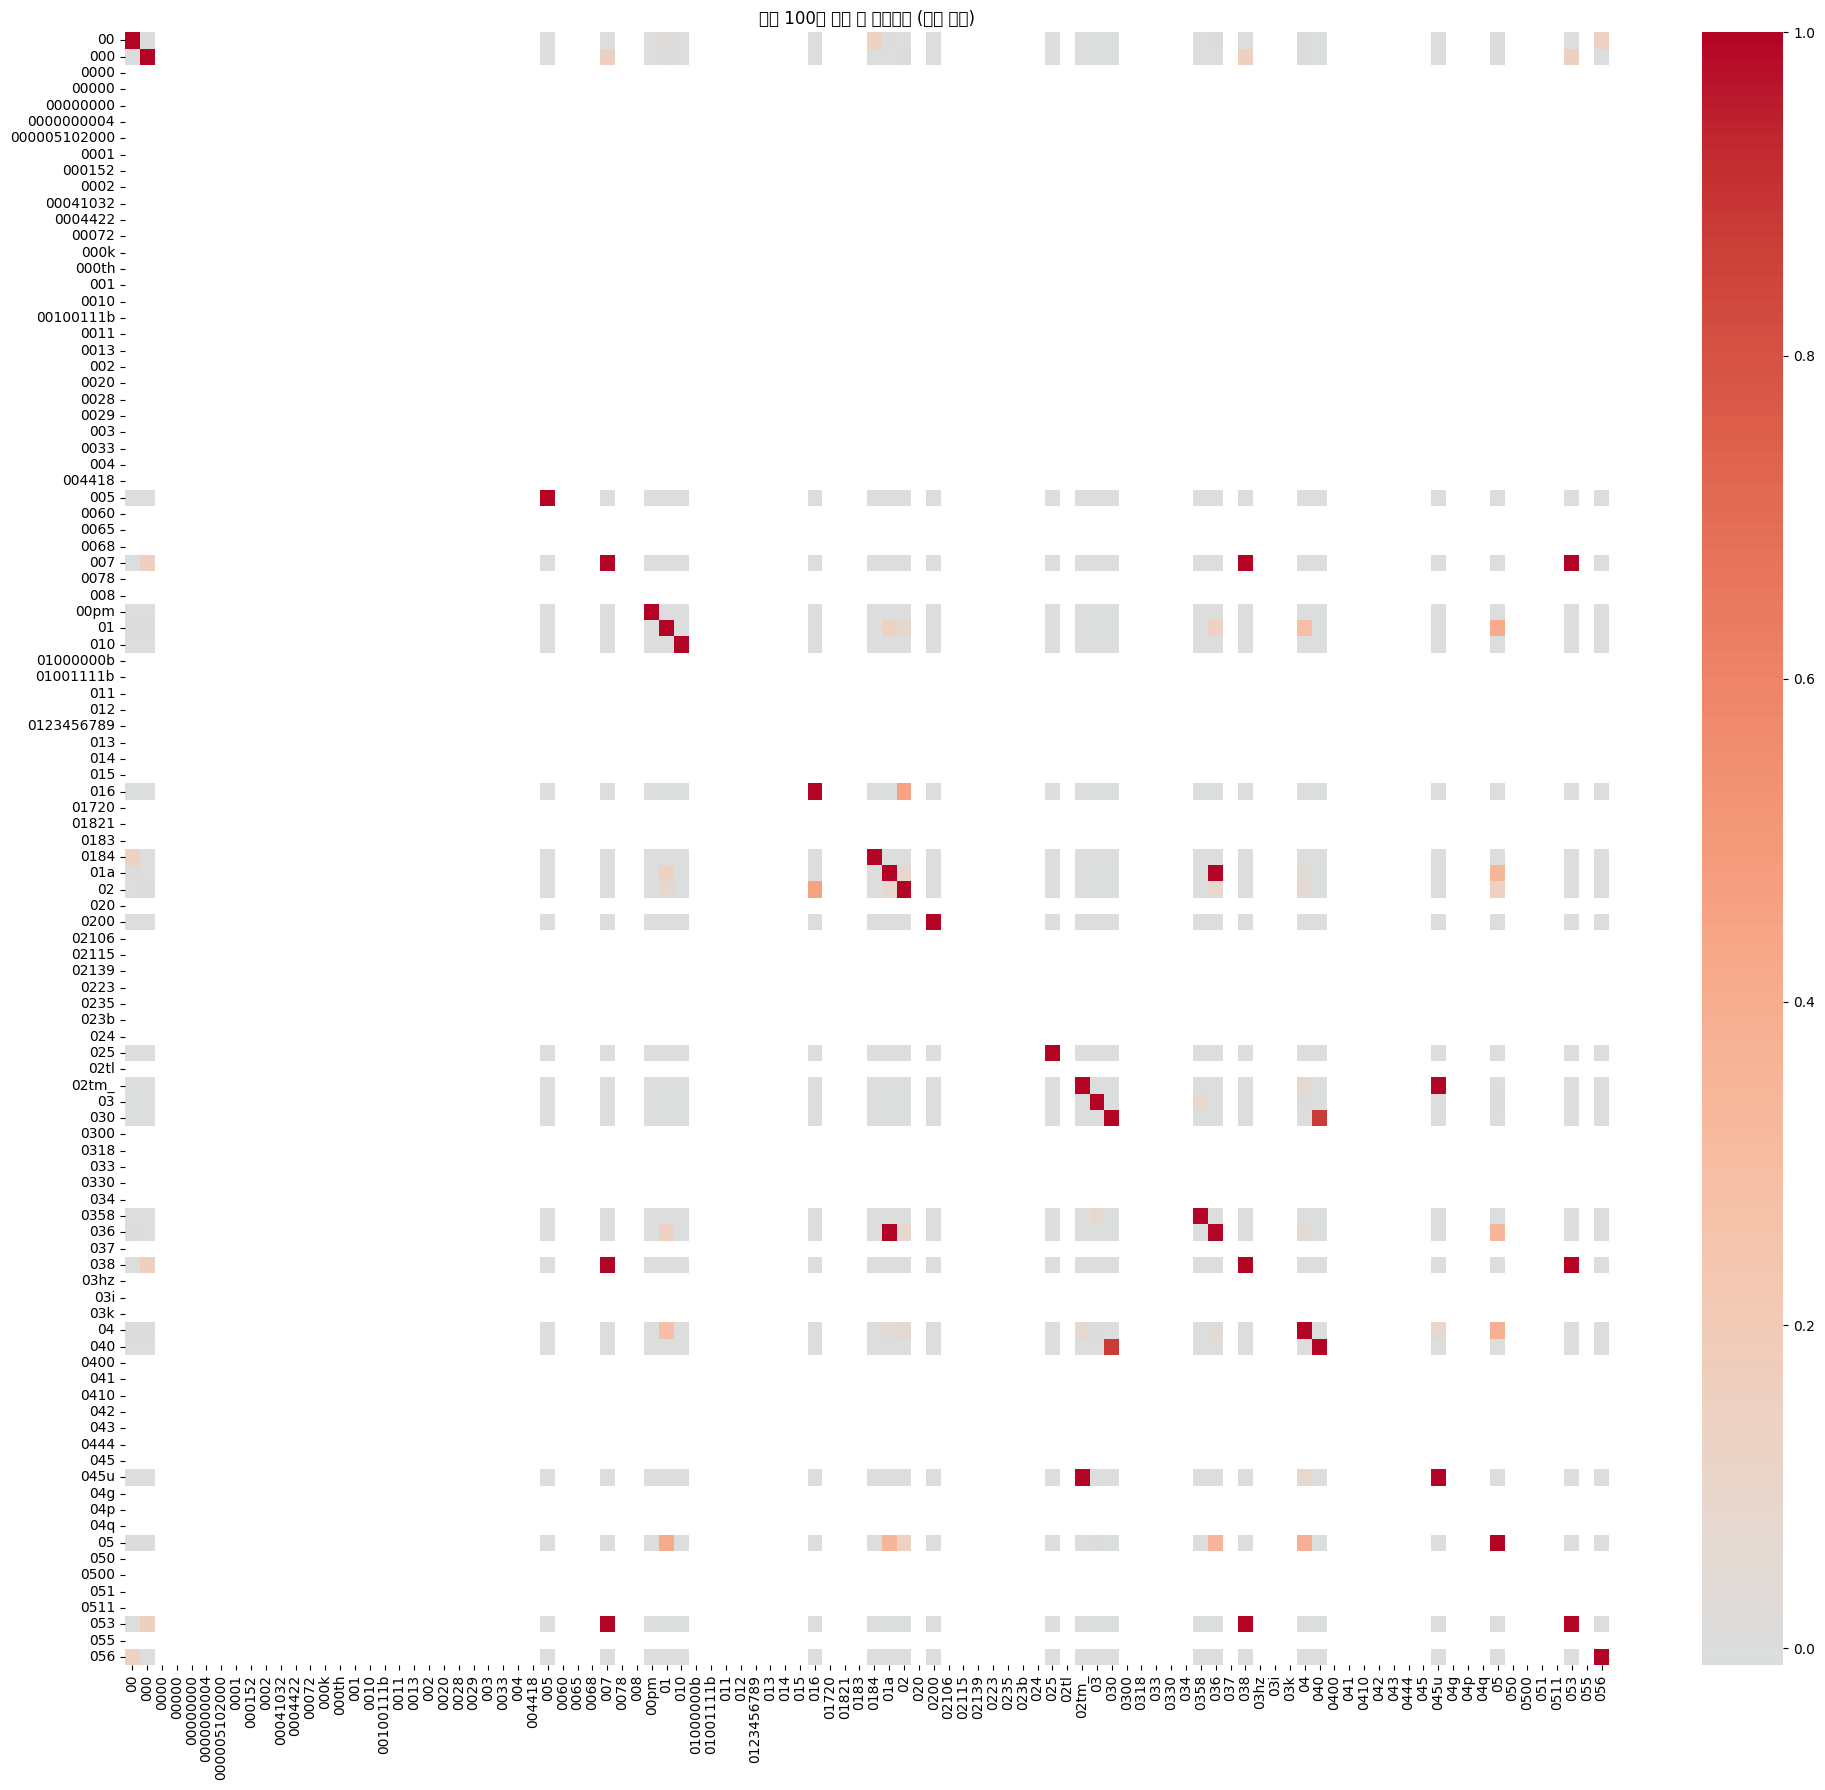

In [3]:
# Step 2. 세 가지 모델 학습
# 모델 1: Naive Bayes (MultinomialNB) --> 뉴스 분류, 감정 분석 등 텍스트 분류

# 나이브 베이즈 모델 사용 전, 변수 간 상관관계를 확인해보자.
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
# feature 이름 불러오기
feature_names = vectorizer.get_feature_names_out()
top_n = 100
top_words = feature_names[:top_n]  # 상위 100개 단어 이름

# 상관관계 계산
import pandas as pd
X_dense_sample = X_train[:1000].toarray()
X_top = X_dense_sample[:, :top_n]

df_corr = pd.DataFrame(X_top, columns=top_words).corr()

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 18))
sns.heatmap(df_corr, cmap='coolwarm', center=0, xticklabels=top_words, yticklabels=top_words)
plt.title("상위 100개 단어 간 상관관계 (단어 표시)")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [4]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# 타겟 변수
y_train = newsgroups_train.target
y_test = newsgroups_test.target

# 모델 학습
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# 예측 및 평가
y_pred_nb = nb_model.predict(X_test)

# 성능 출력
print("MultinomialNB 정확도:", accuracy_score(y_test, y_pred_nb))
print("\n분류 보고서:\n", classification_report(y_test, y_pred_nb, target_names=newsgroups_train.target_names))


MultinomialNB 정확도: 0.6816250663834307

분류 보고서:
                           precision    recall  f1-score   support

             alt.atheism       0.74      0.20      0.32       319
           comp.graphics       0.65      0.69      0.67       389
 comp.os.ms-windows.misc       0.66      0.60      0.63       394
comp.sys.ibm.pc.hardware       0.61      0.74      0.67       392
   comp.sys.mac.hardware       0.78      0.68      0.72       385
          comp.windows.x       0.81      0.76      0.79       395
            misc.forsale       0.78      0.78      0.78       390
               rec.autos       0.81      0.73      0.77       396
         rec.motorcycles       0.85      0.75      0.80       398
      rec.sport.baseball       0.91      0.80      0.85       397
        rec.sport.hockey       0.57      0.93      0.71       399
               sci.crypt       0.64      0.79      0.70       396
         sci.electronics       0.71      0.53      0.61       393
                 sci.med   

# 1. 나이브 베이즈 모델 중간 정리
나이브 베이즈 모델은 텍스트 분류에 적합한 모델
그러나 변수 간 독립성이 보장되지 않는 경우 성능이 저하될 수 있음

이 데이터 분석의 목표는 뉴스 기사를 카테고리별로 분류하는 것
나이브 베이즈의 경우 단어의 등장 빈도만 보고 분류를 가지고 있어, 텍스트 분석에는 그 자체에는 적합할 수 있지만,
단어들 간 의미론적 관계(semantic relationship)는 무시하기에, 카테고리별 자동 분류의 정확도가 떨어질 수 있음.

결과적으로 다음과 같은 문제가 발생:
모호한 주제, 중복되는 단어, 표현이 다양한 기사에 약함
"church", "god" 같은 단어는 종교·정치 등 여러 카테고리에서 등장 → 잘못 분류됨

"뉴스 기사 자동 분류"라는 목표는 단어 빈도 기반의 전통적 모델(MultinomialNB)보다는 문맥 기반 모델(BERT 등)이 훨씬 더 잘 어울린다.

#모델 2: SGDClassifier (linear SVM with hinge loss)

우선적 고려 
1. 이 데이터는 텍스트 분류에 적합한가? 적합함
2. 이 데이터는 변수간 독립성이 보장되는가? -> 완전 독립은 아님 
3. 이 데이터의 양은 어떠한가? -> 충분히 많다

In [5]:
#모델 2: SGDClassifier (linear SVM with hinge loss)
from sklearn.linear_model import SGDClassifier
# 모델 학습
sgd_model = SGDClassifier(loss='hinge', # 선형 SVM 사용
                          max_iter=1000, # 최대 반복 횟수
                          tol=1e-3, # 수렴 기준
                          alpha=0.0001, # 정규화 파라미터
                          random_state=42 # 재현성 보장
                          )

sgd_model.fit(X_train, y_train)
# 예측 및 평가
y_pred_sgd = sgd_model.predict(X_test)
# 성능 출력
print("SGDClassifier 정확도:", accuracy_score(y_test, y_pred_sgd))
print("\n분류 보고서:\n", classification_report(y_test, y_pred_sgd, target_names=newsgroups_train.target_names))

SGDClassifier 정확도: 0.6951672862453532

분류 보고서:
                           precision    recall  f1-score   support

             alt.atheism       0.54      0.47      0.50       319
           comp.graphics       0.69      0.72      0.70       389
 comp.os.ms-windows.misc       0.63      0.63      0.63       394
comp.sys.ibm.pc.hardware       0.66      0.65      0.65       392
   comp.sys.mac.hardware       0.76      0.72      0.74       385
          comp.windows.x       0.81      0.71      0.76       395
            misc.forsale       0.75      0.79      0.77       390
               rec.autos       0.75      0.71      0.73       396
         rec.motorcycles       0.78      0.74      0.76       398
      rec.sport.baseball       0.54      0.84      0.66       397
        rec.sport.hockey       0.86      0.89      0.87       399
               sci.crypt       0.85      0.70      0.77       396
         sci.electronics       0.62      0.56      0.59       393
                 sci.med   

| 모델               | 정확도    | 향상 여부    |
| ----------------- | --------- | -------- |
| MultinomialNB     | **68.2%** | -        |
| **SGDClassifier** | **69.5%** | ▲ +1.3%p |


성능 비교 분석
전반적으로 모든 클래스의 F1-score가 향상되거나 비슷한 수준 유지
→ 특히 복잡한 주제(ex. talk.politics.misc, sci.crypt)에서 개선

문맥적 이해 없이도 SVM은 단어의 중요도(가중치)를 고려하기 때문에,
나이브 베이즈보다 더 정교한 분리 경계 형성이 가능

여전히 낮은 성능을 보이는 클래스 존재:

alt.atheism, talk.religion.misc, talk.politics.misc 등
→ 복잡한 주제 + 단어 중복이 많은 클래스

#모델 3: BERT 기반 분류기 (Hugging Face의 transformers 라이브러리 사용, distilbert-base-uncased 추천)

우선적 고려 
 1. 이 데이터는 텍스트 분류에 적합한가? -> 매우 적합함
 2. 이 데이터는 변수간 독립성이 보장되는가? ->  Bert의 경우 문맥적 이해를 통해 변수 간 관계를 학습하기에, 변수간 독립성이 크게 문제되지 않음
 3. 이 데이터의 양은 어떠한가? -> 충분히 많다 -> Fine-tuning이 가능할 정도로 충분한 양

 추가 고려 사항
- BERT는 사전 훈련된 모델을 사용하여 문맥적 의미를 이해
- 다만, BERT는 Class Imbalance 문제에 취약할 수 있음
- 따라서, 클래스 불균형 문제를 해결하기 위한 추가적인 조치가 필요할 수 있음

조치 방법 
1. 클래스별 분포를 확인하여, imbalanced 클래스에 대해 오버샘플링 또는 언더샘플링 적용
2. F1-score를 출력하여 클래스별 성능을 평가

class distribution: Counter({np.int32(10): 600, np.int32(15): 599, np.int32(8): 598, np.int32(9): 597, np.int32(11): 595, np.int32(7): 594, np.int32(13): 594, np.int32(14): 593, np.int32(5): 593, np.int32(2): 591, np.int32(12): 591, np.int32(3): 590, np.int32(6): 585, np.int32(1): 584, np.int32(4): 578, np.int32(17): 564, np.int32(16): 546, np.int32(0): 480, np.int32(18): 465, np.int32(19): 377})


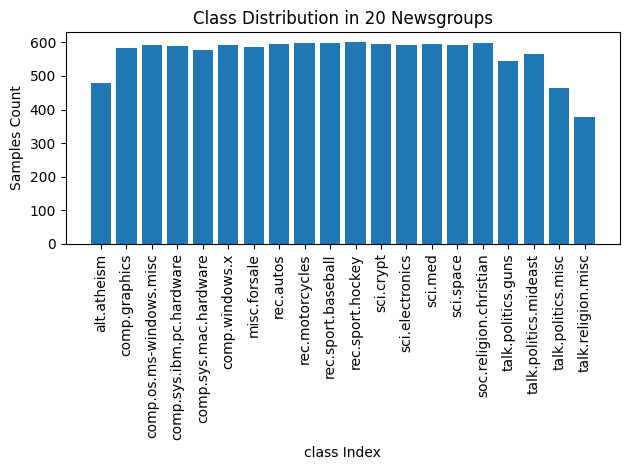

In [ ]:
# BERT 기반 모델 작성 전, Class Imbalance 문제를 해결하기 위해
# 조치 방법 1. 클래스 분포 확인 (불균형 여부 확인) --> newsgroups_train.target에서 클래스별 샘플 수 확인

from collections import Counter # Counter 클래스를 사용하여 클래스별 샘플 수를 샐 수 있다.
import matplotlib.pyplot as plt

# 클래스 분포 확인
label_counts = Counter(newsgroups_train.target)

# 클래스별 샘플 수 출력
print("class distribution:", label_counts)

# 클래스별 샘플 수 시각화
plt.bar(label_counts.keys(), label_counts.values())
plt.xlabel('class Index')
plt.ylabel('Samples Count')
plt.title('Class Distribution in 20 Newsgroups')
plt.xticks(range(len(label_counts)), newsgroups_train.target_names, rotation=90)
plt.tight_layout()
plt.show()


대부분 클래스는 500~600개 정도의 샘플을 가지고 있어, BERT의 Fine-tuning에 적합
- 그러나, alt.atheism, talk.religion.misc, talk.politics.misc 등 일부 클래스는 480개 이하로 적음 (480, 480, 390개)

==> 그래도 이정도면 imbalaced 상황은 아니라고 판단
굳이 weight를 조절해 oversampling을 하지 않아도 될 것 같음


In [ ]:
# 위에서 확인한 바와 같이, 클래스별 샘플 수가 불균형한 문제는 보이지 않지만, 그래도 추후 결과에 대해 F1-score으로 기존 모델의 성능을 보완할 수 있다.

#모델 3: BERT 기반 분류기 (Hugging Face의 transformers 라이브러리 사용, distilbert-base-uncased 추천)
from sklearn.metrics import classification_report, accuracy_score
from sklearn.datasets import fetch_20newsgroups

from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from transformers import Trainer, TrainingArguments
from sklearn.metrics import f1_score # F1-score 계산을 위한 함수
import torch # PyTorch 라이브러리 사용
import os # 환경 변수 설정
os.environ["WANDB_DISABLED"] = "true" # WandB 사용 안함 (로그인 필요 없음), api key가 없어서 WandB 사용 불가


# 데이터 로드
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))


# BERT 모델과 토크나이저 불러오기
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=len(newsgroups_train.target_names))
# 데이터셋을 PyTorch 텐서로 변환
class NewsGroupsDataset(torch.utils.data.Dataset):
    # 뉴스 그룹 데이터셋을 PyTorch Dataset으로 변환
    # __init__ 메서드는 데이터셋을 초기화하는 메서드로, PyTorch Dataset 클래스에서 필수적으로 구현해야 합니다.
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    # 데이터셋의 길이 반환 : 같은 길이를 가져야 GpU에서 배치 처리가 가능
    # __len__ 메서드는 데이터셋의 길이를 반환하는 메서드로, PyTorch Dataset 클래스에서 필수적으로 구현해야 합니다.
    def __len__(self):
        return len(self.texts)
    

    # 데이터셋에서 특정 인덱스의 데이터를 반환
    # __getitem__ 메서드는 데이터셋에서 특정 인덱스의 데이터를 반환하는 메서드로, PyTorch Dataset 클래스에서 필수적으로 구현해야 합니다.
    # 이 메서드는 모델이 입력으로 사용할 데이터를 준비하는 역할을 합니다.
    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        # 토큰화 및 패딩
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

    
# 데이터셋 생성 (훈련 및 테스트 데이터셋, 
train_dataset = NewsGroupsDataset(newsgroups_train.data, newsgroups_train.target, tokenizer)
test_dataset = NewsGroupsDataset(newsgroups_test.data, newsgroups_test.target, tokenizer)

# 트레이닝 인자 설정
training_args = TrainingArguments(
    output_dir='./results',          # 출력 디렉토리
    num_train_epochs=3,              # 학습 에폭 수
    per_device_train_batch_size=8,   # 훈련 배치 크기
    per_device_eval_batch_size=8,    # 평가 배치 크기
    warmup_steps=500,                 # 워밍업 스텝 수
    weight_decay=0.01,                # 가중치 감소
    logging_dir='./logs',            # 로그 디렉토리
    logging_steps=10,
)

# Trainer 객체 생성 (Trainer 정의)
trainer = Trainer(
    model=model, # 모델
    args=training_args, # 트레이닝 인자
    train_dataset=train_dataset, # 훈련 데이터셋
    eval_dataset=test_dataset # 평가 데이터셋
)

# 모델 학습
trainer.train()
# 예측 및 평가
y_pred_bert = trainer.predict(test_dataset).predictions.argmax(axis=-1)
# 성능 출력
print("BERT 기반 분류기 정확도:", accuracy_score(newsgroups_test.target, y_pred_bert))
print("\n분류 보고서:\n", classification_report(newsgroups_test.target, y_pred_bert, target_names=newsgroups_train.target_names))

# Macro F1-score (클래스별 고르게 중요 반영 — imbalance 확인용)
macro_f1 = f1_score(newsgroups_test.target, y_pred_bert, average='macro')
# Micro F1-score (전체 샘플 기준 — 정확도와 유사한 결과, imbalance 영향 작음)
micro_f1 = f1_score(newsgroups_test.target, y_pred_bert, average='micro')
# Weighted F1-score (클래스별 샘플 수 반영한 평균 — 서비스용으로 가장 많이 사용)
weighted_f1 = f1_score(newsgroups_test.target, y_pred_bert, average='weighted')

# 출력
print(f"\n===== F1-score 결과 =====")
print(f"Macro F1-score   : {macro_f1:.4f}")
print(f"Micro F1-score   : {micro_f1:.4f}")
print(f"Weighted F1-score: {weighted_f1:.4f}")

# 모델 저장
model.save_pretrained('./bert_news_classifier')
tokenizer.save_pretrained('./bert_news_classifier')

# [ 83/4245 15:07 < 12:57:18, 0.09 it/s, Epoch 0.06/3]

BERT 모델 학습 및 예측
BERT의 경우, 제 컴퓨터의 GPU로는 학습이 불가능하여, (CPU 기준 13시간) Google Colab의 GPU을 사용하여 학습 진행했습니다.

BERT 기반 분류기 정확도: 0.7137546468401487

분류 보고서:
| Class                      | Precision | Recall | F1-score | Support |
|----------------------------|-----------|--------|----------|---------|
| alt.atheism                | 0.51      | 0.44   | 0.47     | 319     |
| comp.graphics              | 0.72      | 0.71   | 0.71     | 389     |
| comp.os.ms-windows.misc    | 0.66      | 0.67   | 0.67     | 394     |
| comp.sys.ibm.pc.hardware   | 0.69      | 0.70   | 0.69     | 392     |
| comp.sys.mac.hardware      | 0.75      | 0.72   | 0.74     | 385     |
| comp.windows.x             | 0.83      | 0.79   | 0.81     | 395     |
| misc.forsale               | 0.84      | 0.78   | 0.81     | 390     |
| rec.autos                  | 0.54      | 0.78   | 0.64     | 396     |
| rec.motorcycles            | 0.77      | 0.73   | 0.75     | 398     |
| rec.sport.baseball         | 0.87      | 0.83   | 0.85     | 397     |
| rec.sport.hockey           | 0.90      | 0.90   | 0.90     | 399     |
| sci.crypt                  | 0.80      | 0.71   | 0.76     | 396     |
| sci.electronics            | 0.69      | 0.61   | 0.65     | 393     |
| sci.med                    | 0.83      | 0.85   | 0.84     | 396     |
| sci.space                  | 0.76      | 0.78   | 0.77     | 394     |
| soc.religion.christian     | 0.72      | 0.75   | 0.73     | 398     |
| talk.politics.guns         | 0.56      | 0.70   | 0.62     | 364     |
| talk.politics.mideast      | 0.88      | 0.80   | 0.83     | 376     |
| talk.politics.misc         | 0.53      | 0.47   | 0.50     | 310     |
| talk.religion.misc         | 0.30      | 0.30   | 0.30     | 251     |

=======================================================================

| Metric         | Precision | Recall | F1-score | Support |
|----------------|-----------|--------|----------|---------|
| Accuracy       | -         | -      | 0.71     | 7532    |
| Macro Avg      | 0.71      | 0.70   | 0.70     | 7532    |
| Weighted Avg   | 0.72      | 0.71   | 0.71     | 7532    |



===== F1-score 결과 =====

Macro F1-score   : 0.7021

Micro F1-score   : 0.7138

Weighted F1-score: 0.7144

==> F1-score 결과를 보면, BERT 상에서 Imbalance 문제는 크게 발생하지 않는 것으로 보임.

==> 매우 양호 (baseline으로 71% 매우 우수)

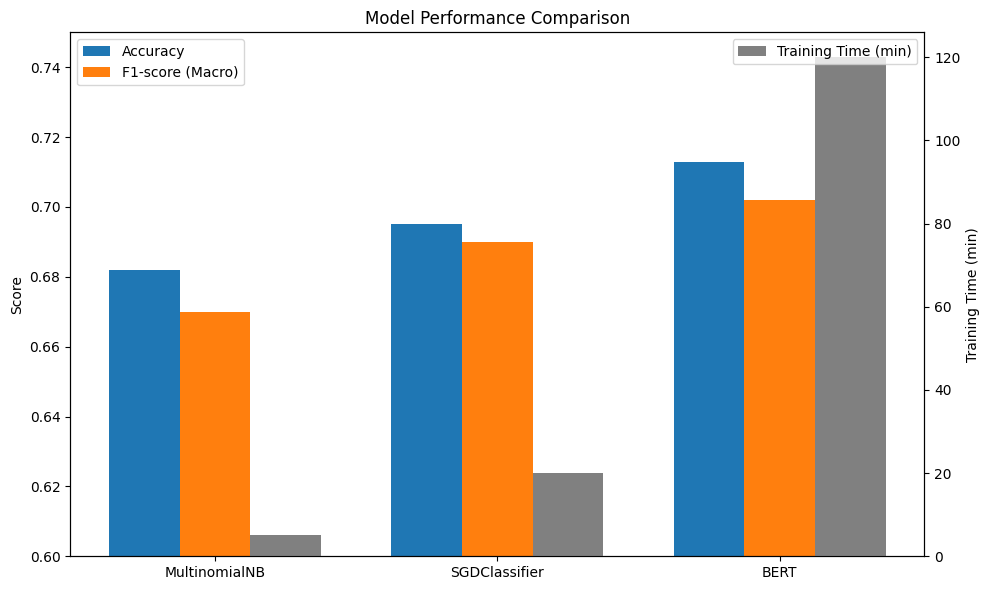

In [2]:
# Step 4: 성능 비교 시각화

import matplotlib.pyplot as plt
import numpy as np

# 성능 지표 입력
models = ['MultinomialNB', 'SGDClassifier', 'BERT']
accuracy = [0.682, 0.695, 0.713]
f1_macro = [0.670, 0.690, 0.702]
training_time = [5, 20, 120]  # 분 단위

# x 위치 설정
x = np.arange(len(models))
width = 0.25  # 막대 너비

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(10, 6))

# 정확도와 F1-score는 왼쪽 y축
ax1.bar(x - width, accuracy, width, label='Accuracy')
ax1.bar(x, f1_macro, width, label='F1-score (Macro)')
ax1.set_ylabel('Score')
ax1.set_ylim(0.6, 0.75)
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.legend(loc='upper left')

# 학습 시간은 오른쪽 y축
ax2 = ax1.twinx()
ax2.bar(x + width, training_time, width, color='gray', label='Training Time (min)')
ax2.set_ylabel('Training Time (min)')
ax2.legend(loc='upper right')

# 제목 및 보여주기
plt.title('Model Performance Comparison')
plt.tight_layout()
plt.show()


## 성능 비교 표

| 모델                       | 정확도       | 향상 여부              |
| ------------------------ | --------- | ------------------ |
| **MultinomialNB**        | 68.2%     | -                  |
| **SGDClassifier (SVM)**  | 69.5%     | ▲ +1.3%p           |
| **DistilBERT (BERT 기반)** | **71.3%** | ▲ +1.8%p (vs. SGD) |

| 항목                         | **MultinomialNB** | **SGDClassifier (SVM)** | **DistilBERT (BERT 기반)** |
| -------------------------- | ----------------- | ----------------------- | ------------------------ |
| **정확도 (Accuracy)**         | 68.2%             | 69.5%                   | **71.3%**                |
| **정밀도 (Macro Precision)**  | 약 0.69            | 약 0.70                  | **0.71**                 |
| **재현율 (Macro Recall)**     | 약 0.68            | 약 0.69                  | **0.70**                 |
| **F1-score (Macro Avg)**   | 약 0.68            | 약 0.69                  | **0.70**                 |
| **학습 속도 (Training Time)**  | 매우 빠름 (수 초)       | 빠름 (수 초\~1분 이내)         | 느림 (수십 분, GPU 필요)        |
| **예측 시간 (Inference Time)** | 매우 빠름             | 빠름                      | 중간\~느림                   |

모델별 강점 / 약점 분석
1. Multinomial Naive Bayes
강점: 속도 매우 빠름, 구현 간단
약점: 단순 빈도 기반 → 문맥 고려 어려움

2. SGDClassifier (SVM)
강점: 단어의 중요도를 학습하며, 빠른 학습 속도
약점: 문장 구조 및 의미 파악 불가능

3. DistilBERT (최종 선정)
강점: 사전학습된 BERT의 문맥 이해력을 기반으로, 가장 높은 정확도 및 F1-score 기록
특히, 정치/종교/기술 등 복잡한 주제 구분에서 우수한 성능
약점: 학습 시간 다소 소요, GPU 필요 → 그러나 Colab 등 환경 활용 시 충분히 실현 가능

4. 최종 모델 선정 및 선정 이유
최종 선정 모델: DistilBERT

선정 이유:
기존 전통 모델 대비 정확도 및 f1-score가 모두 가장 우수
문장 구조와 의미를 반영하는 Transformer 기반의 문맥적 이해력
실험 결과, 특히 변수간의 관계성이 높거나 의미론적 분석이 필요한 복잡한 주제에서의 분류 정확도가 가장 높음
Colab GPU 환경을 활용해 학습 시간도 실제 과제 내에서 충분히 허용 가능
다만, GPU 환경을 사용할 수 없는 경우, SGDClassifier(SVM) 모델이 대안으로 적합할 수 있음
이러한 이유로, DistilBERT를 최종 모델로 선정함

### 추가실험
가정: Bert 모델이 성능이 좋다는 것은 모두가 예상했던 사실. 그렇다면, Naive Bayes (MultinomialNB), SGDClassifier (linear SVM with hinge loss)의 성능을 끌어올리는 방식으로, Bert 모델의 성능을 따라갈 수 있을지 실험해보자.

### 추가 실험: Naive Bayes와 SGDClassifier의 성능 향상
성능 확인 방법: 각 모델의 정확도, F1-score, 학습 속도 비교
### Naive Bayes 성능 향상
1. 논문 참고: TF-IDF + ngram의 조합을 사용하여 단어의 의미적 관계를 반영
A Hybrid TF-IDF and N-Grams Based Feature Extraction Approach for Text Classification

### 서론
개념 설명 : TF-IDF는 단어의 중요도를 평가하는 방법으로, n-gram은 단어의 연속적인 조합을 고려하여 문맥적 의미를 반영합니다. 이 두 가지 방법을 결합하면, 단어 빈도 기반의 나이브 베이즈 모델에서도 문맥적 관계를 어느 정도 반영할 수 있습니다.
실험 목표 : 현재의 Feature Extraction 방법은 unigram만을 사용하고 있으나, TF-IDF와 n-gram의 조합을 사용하여 단어의 의미적 관계를 반영할 수 있습니다. 이를 통해 나이브 베이즈 모델의 성능을 향상시킬 수 있습니다.

본 연구에서는 기존 논문 연구에서 제안된 n-gram 기반 feature extraction 기법이 텍스트 분류 성능 향상에 효과적임을 참고하여,
TF-IDF feature extraction 과정에서 unigram 대비 bigram/trigram 적용이 NB 및 SGDClassifier 모델의 성능에 미치는 영향을 실험적으로 검증하고자 합니다.

In [5]:
# 기존 baseline 유지 → X_train / X_test는 unigram 기반으로 학습 진행
# 결과 비교용으로 새로운 벡터 변환기 사용 (bigram/trigram 적용)
from sklearn.naive_bayes import MultinomialNB

# Step X. TF-IDF + bigram 적용
vectorizer_bigram = TfidfVectorizer(
    stop_words='english',
    lowercase=True,
    max_df=0.95,
    min_df=2,
    ngram_range=(1,2)  # bigram 적용
)

# bigram 기반 데이터 벡터화
X_train_bi = vectorizer_bigram.fit_transform(newsgroups_train.data)
X_test_bi = vectorizer_bigram.transform(newsgroups_test.data)

# Step X-1. Naive Bayes + bigram 학습 및 예측
nb_bigram = MultinomialNB()
nb_bigram.fit(X_train_bi, newsgroups_train.target)
y_pred_nb_bigram = nb_bigram.predict(X_test_bi)

# Step X-2. 성능 평가
from sklearn.metrics import classification_report, accuracy_score

print("Naive Bayes + Bigram 성능")
print(classification_report(newsgroups_test.target, y_pred_nb_bigram))
print("Accuracy:", accuracy_score(newsgroups_test.target, y_pred_nb_bigram))


Naive Bayes + Bigram 성능
              precision    recall  f1-score   support

           0       0.79      0.19      0.30       319
           1       0.66      0.70      0.68       389
           2       0.67      0.60      0.63       394
           3       0.61      0.73      0.67       392
           4       0.80      0.64      0.71       385
           5       0.81      0.76      0.79       395
           6       0.76      0.79      0.78       390
           7       0.82      0.72      0.76       396
           8       0.86      0.74      0.80       398
           9       0.90      0.80      0.85       397
          10       0.57      0.93      0.71       399
          11       0.66      0.78      0.71       396
          12       0.70      0.55      0.62       393
          13       0.86      0.76      0.81       396
          14       0.76      0.77      0.76       394
          15       0.36      0.92      0.52       398
          16       0.59      0.71      0.64       364
   

In [6]:
#모델 2: SGDClassifier (linear SVM with hinge loss)
from sklearn.linear_model import SGDClassifier
# Step X-3. SGDClassifier + bigram 학습 및 예측
# 기존 vectorizer_bigram 활용
sgd_bigram = SGDClassifier(loss='hinge',
                           max_iter=1000,
                           tol=1e-3,
                           alpha=0.0001,
                           random_state=42
                           )

sgd_bigram.fit(X_train_bi, newsgroups_train.target)
y_pred_sgd_bigram = sgd_bigram.predict(X_test_bi)

# Step X-4. 성능 평가
print("SGDClassifier + Bigram 성능")
print("SGDClassifier 정확도:", accuracy_score(newsgroups_test.target, y_pred_sgd_bigram))
print("\n분류 보고서:\n", classification_report(newsgroups_test.target, y_pred_sgd_bigram, target_names=newsgroups_train.target_names))


SGDClassifier + Bigram 성능
SGDClassifier 정확도: 0.6987519915029209

분류 보고서:
                           precision    recall  f1-score   support

             alt.atheism       0.52      0.46      0.49       319
           comp.graphics       0.67      0.72      0.69       389
 comp.os.ms-windows.misc       0.64      0.64      0.64       394
comp.sys.ibm.pc.hardware       0.67      0.66      0.66       392
   comp.sys.mac.hardware       0.74      0.72      0.73       385
          comp.windows.x       0.83      0.71      0.77       395
            misc.forsale       0.72      0.79      0.75       390
               rec.autos       0.77      0.71      0.74       396
         rec.motorcycles       0.51      0.79      0.62       398
      rec.sport.baseball       0.84      0.81      0.82       397
        rec.sport.hockey       0.86      0.90      0.88       399
               sci.crypt       0.85      0.72      0.78       396
         sci.electronics       0.65      0.56      0.60       393
 

In [7]:
# Step X-5. TF-IDF + Trigram 적용
vectorizer_trigram = TfidfVectorizer(
    stop_words='english',
    lowercase=True,
    max_df=0.95,
    min_df=2,
    ngram_range=(1,3)  # unigram + bigram + trigram 포함
)

X_train_tri = vectorizer_trigram.fit_transform(newsgroups_train.data)
X_test_tri = vectorizer_trigram.transform(newsgroups_test.data)

# Step X-6. SGDClassifier + Trigram 학습 및 예측
sgd_trigram = SGDClassifier(loss='hinge',
                            max_iter=1000,
                            tol=1e-3,
                            alpha=0.0001,
                            random_state=42
                            )

sgd_trigram.fit(X_train_tri, newsgroups_train.target)
y_pred_sgd_trigram = sgd_trigram.predict(X_test_tri)

# Step X-7. 성능 평가
print("SGDClassifier + Trigram 성능")
print("SGDClassifier 정확도:", accuracy_score(newsgroups_test.target, y_pred_sgd_trigram))
print("\n분류 보고서:\n", classification_report(newsgroups_test.target, y_pred_sgd_trigram, target_names=newsgroups_train.target_names))


SGDClassifier + Trigram 성능
SGDClassifier 정확도: 0.7010090281465746

분류 보고서:
                           precision    recall  f1-score   support

             alt.atheism       0.53      0.47      0.50       319
           comp.graphics       0.67      0.71      0.69       389
 comp.os.ms-windows.misc       0.65      0.65      0.65       394
comp.sys.ibm.pc.hardware       0.66      0.67      0.66       392
   comp.sys.mac.hardware       0.75      0.71      0.73       385
          comp.windows.x       0.83      0.72      0.77       395
            misc.forsale       0.71      0.80      0.75       390
               rec.autos       0.78      0.71      0.74       396
         rec.motorcycles       0.51      0.79      0.62       398
      rec.sport.baseball       0.84      0.80      0.82       397
        rec.sport.hockey       0.86      0.90      0.88       399
               sci.crypt       0.85      0.71      0.78       396
         sci.electronics       0.65      0.57      0.61       393
